# Telecom churn case study
Using 21 predictor variable we need to predict whether the customer switch to another telecom provider or not in telecom terminology it refers to churning or not churning

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
import pandas as pd
import numpy as np

In [48]:
churn_data=pd.read_csv('/content/drive/MyDrive/1-churn_data.csv')
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
customer_data=pd.read_csv('/content/drive/MyDrive/1-customer_data.csv')
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [50]:
internet_data=pd.read_csv('/content/drive/MyDrive/1-internet_data.csv')
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [51]:
merge_1=pd.merge(churn_data,customer_data, how='inner', on='customerID')

In [52]:
telecom=pd.merge(merge_1,internet_data,how='inner', on='customerID')

In [53]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [54]:
telecom.shape

(7043, 21)

In [55]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [56]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [57]:
conv_list=['PhoneService','PaperlessBilling','Churn','Partner','Dependents']
def convmap(x):
    return x.map({'Yes':1,'No':0})
telecom[conv_list]=telecom[conv_list].apply(convmap)

In [58]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

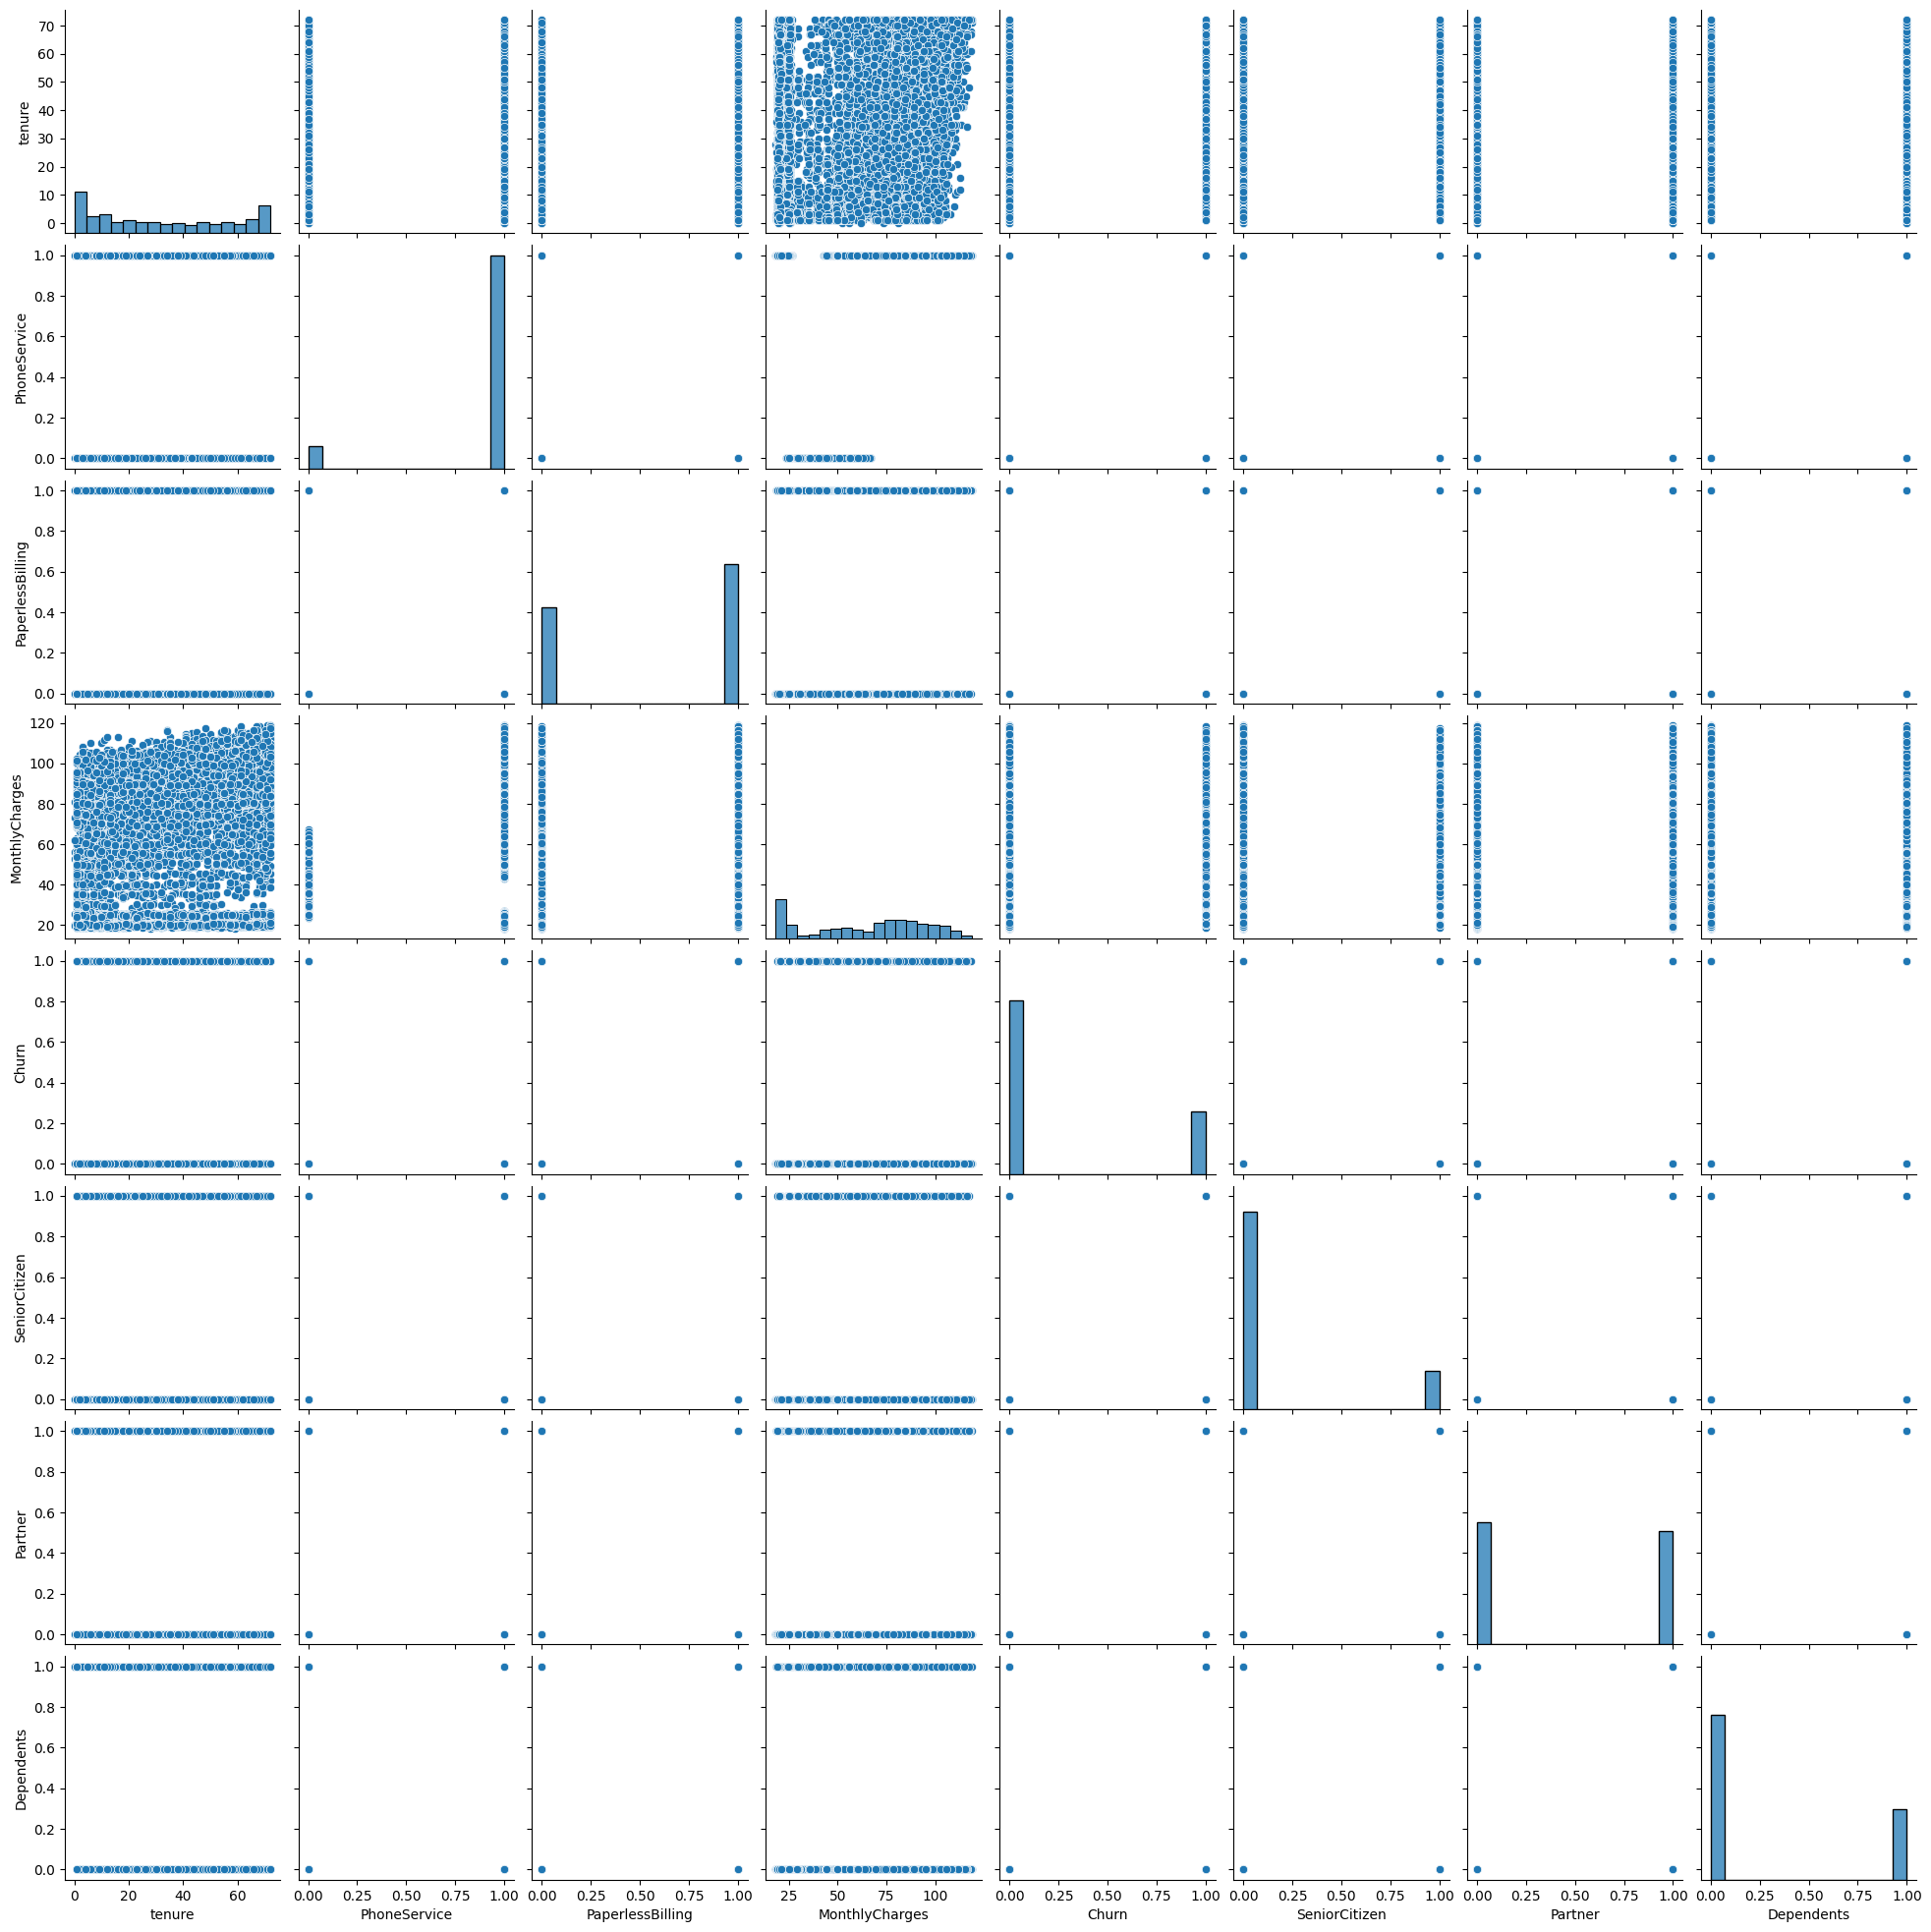

In [60]:
sns.pairplot(telecom)
plt.show()

In [61]:
dummy=pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True)
telecom=pd.concat([telecom,dummy],axis=1)

In [62]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,No,No,0,0,0,1,0,0,1,0


In [63]:
ml=pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
ml1=ml.drop(['MultipleLines_No phone service'],1)
telecom=pd.concat([telecom,ml1],axis=1)
os=pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1=os.drop(['OnlineSecurity_No internet service'],1)
telecom=pd.concat([telecom,os1],axis=1)
ob=pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1=ob.drop(['OnlineBackup_No internet service'],1)
telecom=pd.concat([telecom,ob1],axis=1)
dp=pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1=dp.drop(['DeviceProtection_No internet service'],1)
telecom=pd.concat([telecom,dp1],axis=1)
ts=pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1=ts.drop(['TechSupport_No internet service'],1)
telecom=pd.concat([telecom,ts1],axis=1)
sm=pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1=sm.drop(['StreamingMovies_No internet service'],1)
telecom=pd.concat([telecom,sm1],axis=1)

In [64]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,0,1,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,1,1,0,0,1,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,0,1,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,1,1,0,0,1,0,1,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


In [65]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   Contract                               7043 non-null   object 
 4   PaperlessBilling                       7043 non-null   int64  
 5   PaymentMethod                          7043 non-null   object 
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   object 
 8   Churn                                  7043 non-null   int64  
 9   gender                                 7043 non-null   object 
 10  SeniorCitizen                          7043 non-null   int64  
 11  Part

In [66]:
telecom=telecom.drop(['Contract','DeviceProtection','StreamingTV','PaymentMethod','gender','InternetService','MultipleLines','OnlineBackup','OnlineSecurity','StreamingMovies','TechSupport'],1)

In [67]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [68]:
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],downcast='float',errors='coerce')

In [69]:
telecom['TotalCharges']

0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7043, dtype: float32

In [70]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

In [71]:
round(100*(telecom.isnull().sum()/len(telecom.index)),2)

customerID                               0.00
tenure                                   0.00
PhoneService                             0.00
PaperlessBilling                         0.00
MonthlyCharges                           0.00
TotalCharges                             0.16
Churn                                    0.00
SeniorCitizen                            0.00
Partner                                  0.00
Dependents                               0.00
Contract_One year                        0.00
Contract_Two year                        0.00
PaymentMethod_Credit card (automatic)    0.00
PaymentMethod_Electronic check           0.00
PaymentMethod_Mailed check               0.00
gender_Male                              0.00
InternetService_Fiber optic              0.00
InternetService_No                       0.00
MultipleLines_No                         0.00
MultipleLines_Yes                        0.00
OnlineSecurity_No                        0.00
OnlineSecurity_Yes                

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X=telecom.drop(['Churn','customerID'],axis=1)

In [74]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.850000,0,1,0,0,0,...,1,0,0,1,1,0,1,0,1,0
1,34,1,0,56.95,1889.500000,0,0,0,1,0,...,0,1,1,0,0,1,1,0,1,0
2,2,1,1,53.85,108.150002,0,0,0,0,0,...,0,1,0,1,1,0,1,0,1,0
3,45,0,0,42.30,1840.750000,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
4,2,1,1,70.70,151.649994,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [75]:
y=telecom['Churn']
y.head()


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [76]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5,random_state=42)

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()
num_vars = ['tenure','MonthlyCharges','TotalCharges']
X_train[num_vars]=scaler.fit_transform(X_train[num_vars])

In [79]:
X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingMovies_No,StreamingMovies_Yes
2767,0.556477,1,1,0.675524,0.743395,0,0,1,0,0,...,1,0,1,0,0,1,0,1,1,0
4712,0.720057,1,1,1.450611,1.395535,0,1,1,1,0,...,0,1,0,1,0,1,1,0,0,1
6064,-1.283794,0,1,-0.630061,-0.989777,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
942,-0.343211,1,1,0.511912,-0.123667,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
1036,1.456165,1,1,1.663801,2.466581,0,1,1,0,1,...,0,1,0,1,0,1,0,1,0,1


In [80]:
churn=(sum(y)/len(y.index))*100
churn

26.536987079369588

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

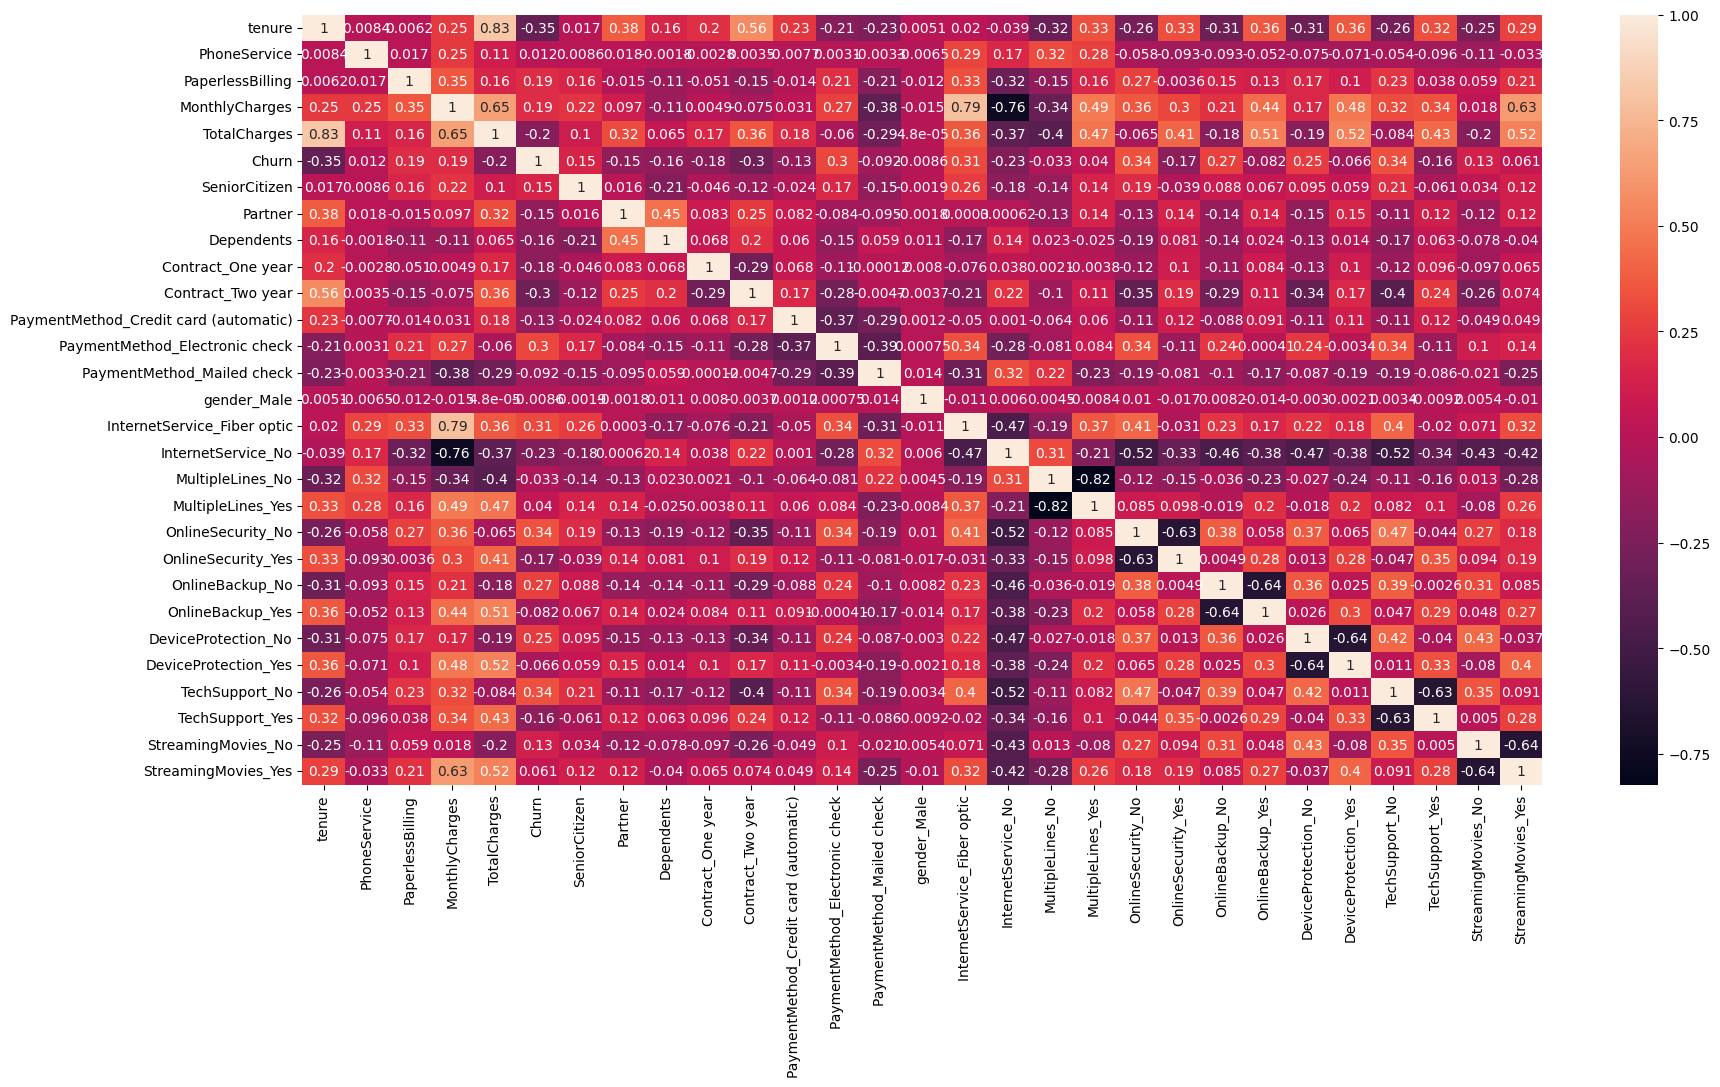

In [82]:
plt.figure(figsize=(20,10))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

In [83]:
import statsmodels.api as sm

In [86]:
import pandas as pd
import statsmodels.api as sm

# Assuming y_train is a pandas Series
y_train = y_train.reset_index(drop=True)

# Reset the index of X_train
X_train = X_train.reset_index(drop=True)

# Fit the GLM
logml = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
result = logml.fit()
result.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3521
Model:                            GLM   Df Residuals:                     3498
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1484.6
Date:                Fri, 29 Sep 2023   Deviance:                       2969.2
Time:                        18:13:49   Pearson chi2:                 4.05e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2646
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.8531      0.361     -2.362      0.018      -1.561      -0.145
tenure                                   -1.4129      0.204     -6.914      0.000      -1.813      -1.012
PhoneService                             -0.3772      0.203     -1.856      0.064      -0.776       0.021
PaperlessBilling                          0.3533      0.105      3.371      0.001       0.148       0.559
MonthlyCharges                            0.0934      0.337      0.277      0.782      -0.567       0.754
TotalCharges                              0.8254      0.216      3.826      0.000       0.403       1.248
SeniorCitizen                             0.2020      0.118      1.711      0.087      -0.029       0.433
Partner                                   0.0305      0.109      0.280      0.779      -0.182       0.243
Dependents                               -0.2106      0.127     -1.663      0.096      -0.459       0.038
Contract_One year                        -0.6954      0.147     -4.718      0.000      -0.984      -0.407
Contract_Two year                        -1.4749      0.238     -6.205      0.000      -1.941      -1.009
PaymentMethod_Credit card (automatic)     0.0028      0.160      0.018      0.986      -0.311       0.317
PaymentMethod_Electronic check            0.2947      0.132      2.235      0.025       0.036       0.553
PaymentMethod_Mailed check               -0.0350      0.162     -0.216      0.829      -0.352       0.282
gender_Male                              -0.0470      0.091     -0.518      0.605      -0.225       0.131
InternetService_Fiber optic               0.5710      0.310      1.839      0.066      -0.038       1.180
InternetService_No                       -0.7066      0.396     -1.783      0.075      -1.484       0.070
MultipleLines_No                         -0.2501      0.095     -2.635      0.008      -0.436      -0.064
MultipleLines_Yes                        -0.1271      0.139     -0.912      0.362      -0.400       0.146
OnlineSecurity_No                         0.1580      0.061      2.601      0.009       0.039       0.277
OnlineSecurity_Yes                       -0.3045      0.082     -3.721      0.000      -0.465      -0.144
OnlineBackup_No                           0.0682      0.056      1.212      0.226      -0.042       0.179
OnlineBackup_Yes                         -0.2147      0.078     -2.762      0.006      -0.367      -0.062
DeviceProtection_No                      -0.0914      0.060     -1.531      0.126      -0.208       0.026
DeviceProtection_Yes                     -0.0551      0.083     -0.666      0.505      -0.217       0.107
TechSupport_No                            0.0961      0.063      1.524      0.128      -0.028       0.220
TechSuppo

In [87]:
#Feauture selection using RFE
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()


In [88]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,step=15)
rfe=rfe.fit(X_train,y_train)

In [89]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True, False, False,  True, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False])

In [90]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 2),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 2),
 ('Dependents', True, 1),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', False, 2),
 ('PaymentMethod_Electronic check', True, 1),
 ('PaymentMethod_Mailed check', False, 2),
 ('gender_Male', False, 2),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', False, 2),
 ('MultipleLines_No', True, 1),
 ('MultipleLines_Yes', False, 2),
 ('OnlineSecurity_No', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_No', False, 2),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_No', False, 2),
 ('DeviceProtection_Yes', False, 2),
 ('TechSupport_No', True, 1),
 ('TechSupport_Yes', False, 2),
 ('StreamingMovies_No', False, 2),
 ('StreamingMovies_Yes', False, 2)]

In [91]:
col=X_train.columns[rfe.support_]

In [92]:
X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'gender_Male', 'InternetService_No',
       'MultipleLines_Yes', 'OnlineBackup_No', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_Yes',
       'StreamingMovies_No', 'StreamingMovies_Yes'],
      dtype='object')

In [93]:
#again building model
X_train_sm=sm.add_constant(X_train[col])
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3521
Model:                            GLM   Df Residuals:                     3506
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1491.5
Date:                Fri, 29 Sep 2023   Deviance:                       2983.0
Time:                        18:14:13   Pearson chi2:                 4.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.2617
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.7611      0.258     -6.837      0.000      -2.266      -1.256
tenure                            -1.4904      0.194     -7.692      0.000      -1.870      -1.111
PhoneService                      -0.4684      0.203     -2.303      0.021      -0.867      -0.070
PaperlessBilling                   0.3668      0.104      3.522      0.000       0.163       0.571
TotalCharges                       0.9159      0.196      4.685      0.000       0.533       1.299
SeniorCitizen                      0.2200      0.116      1.891      0.059      -0.008       0.448
Dependents                        -0.2009      0.115     -1.751      0.080      -0.426       0.024
Contract_One year                 -0.6552      0.146     -4.498      0.000      -0.941      -0.370
Contract_Two year                 -1.4472      0.237     -6.094      0.000      -1.913      -0.982
PaymentMethod_Electronic check     0.3255      0.096      3.386      0.001       0.137       0.514
InternetService_Fiber optic        0.6824      0.135      5.058      0.000       0.418       0.947
MultipleLines_No                  -0.1448      0.112     -1.296      0.195      -0.364       0.074
OnlineSecurity_No                  0.5260      0.202      2.606      0.009       0.130       0.922
OnlineSecurity_Yes                 0.0650      0.215      0.302      0.763      -0.357       0.487
TechSupport_No                     0.3020      0.122      2.479      0.013       0.063       0.541
==================================================================================================
"""

In [94]:
y_train_pred=res.predict(X_train_sm)
y_train_pred[:10]

0    0.268225
1    0.242540
2    0.608366
3    0.475322
4    0.064500
5    0.012347
6    0.016193
7    0.617488
8    0.133519
9    0.063095
dtype: float64

In [95]:
y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26822525, 0.24253955, 0.60836581, 0.47532212, 0.06449962,
       0.0123469 , 0.01619318, 0.61748796, 0.13351919, 0.06309546])

In [96]:
y_train_pred_final=pd.DataFrame({'churn':y_train.values,'churn_prob':y_train_pred})
y_train_pred_final['CustID']=y_train.index
y_train_pred_final

,churn,churn_prob,CustID
0,0,0.268225,0
1,0,0.242540,1
2,1,0.608366,2
3,0,0.475322,3
4,0,0.064500,4
...,...,...,...
3516,1,0.597330,3516
3517,0,0.051826,3517
3518,0,0.191420,3518
3519,1,0.730665,3519


In [97]:
y_train_pred_final['predicted']=y_train_pred_final.churn_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head(20)

,churn,churn_prob,CustID,predicted
0,0,0.268225,0,0
1,0,0.242540,1,0
2,1,0.608366,2,1
3,0,0.475322,3,1
4,0,0.064500,4,0
5,0,0.012347,5,0
6,0,0.016193,6,0
7,1,0.617488,7,1
8,0,0.133519,8,0
9,0,0.063095,9,0


In [98]:
from sklearn import metrics

In [99]:
confusion=metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final.predicted)
print(confusion)

[[1941  657]
 [ 223  700]]


In [100]:
print(metrics.accuracy_score(y_train_pred_final.churn,y_train_pred_final.predicted))

0.750071002556092


In [101]:
TP=confusion[1,1]  # true postive
TN=confusion[0,0]  # true negative
FP=confusion[0,1]  # false postive
FN=confusion[1,0]  # false negative

In [102]:
#sensitivity
TP/float(TP+FN)

0.7583965330444203

In [103]:
#specificity
TN/float(TN+FP)

0.7471131639722863

In [104]:
#false postive rate
FP/float(TN+FP)

0.2528868360277136

In [105]:
#positive preditive value
TP/float(TP+FP)

0.5158437730287398

In [106]:
#Negative predictive value
TN/float(TN+FN)

0.8969500924214417

In [107]:
def draw_roc(actual,probs):
  fpr,tpr,threshoold=metrics.roc_curve(actual,probs,drop_intermediate=False)
  auc_score=metrics.roc_auc_score(actual,probs)
  plt.figure(figsize=(5,5))
  plt.plot(fpr,tpr,label='ROC curve(area=%0.2f)'%auc_score)
  plt.plot([0,1],[0,1],'k--')
  plt.xlim([0.0,1.0])
  plt.ylim([0.0,1.05])
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('Receiver operating characterstics  ')
  plt.legend(loc="lower right")
  plt.show()
  return None

In [108]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
fpr,tpr,threshold=metrics.roc_curve(y_train_pred_final.churn,y_train_pred_final.churn_prob,drop_intermediate=False)

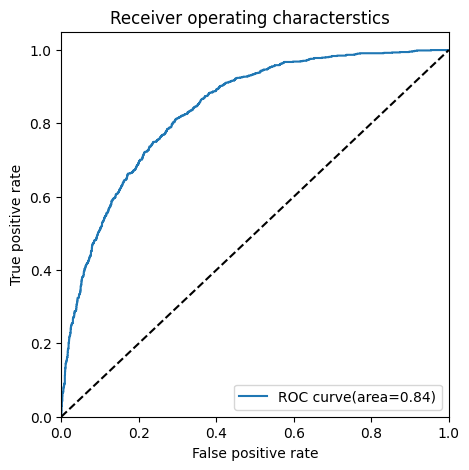

In [110]:
draw_roc(y_train_pred_final.churn,y_train_pred_final.churn_prob)

In [111]:
#lets find optimal cutoff point
#create columns with different probablities
numbers=[float(x)/10 for x in range(10)]
for i in numbers:
  y_train_pred_final[i]=y_train_pred_final.churn_prob.map(lambda x:1 if x> i else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.268225,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.242540,1,0,1,1,1,0,0,0,0,0,0,0
2,1,0.608366,2,1,1,1,1,1,1,1,1,0,0,0
3,0,0.475322,3,1,1,1,1,1,1,0,0,0,0,0
4,0,0.064500,4,0,1,0,0,0,0,0,0,0,0,0


In [112]:
#lets calculate accuracy,specificity, and sensitivity for various probablity cutoff
cutoff_dr=pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
num=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
  cm1=metrics.confusion_matrix(y_train_pred_final.churn,y_train_pred_final[i])
  total1=sum(sum(cm1))
  accuracy=(cm1[0,0]+cm1[1,1])/total1
  speci=cm1[0,0]/(cm1[0,0]+cm1[0,1])
  sensi=cm1[1,1]/(cm1[1,0]+cm1[1,1])
  cutoff_dr.loc[i]=[i , accuracy,sensi,speci]
print(cutoff_dr)

     prob  accuracy     sensi     speci
0.0   0.0  0.262141  1.000000  0.000000
0.1   0.1  0.596989  0.946912  0.472671
0.2   0.2  0.694405  0.867822  0.632794
0.3   0.3  0.750071  0.758397  0.747113
0.4   0.4  0.781596  0.663055  0.823711
0.5   0.5  0.797217  0.518960  0.896074
0.6   0.6  0.790968  0.341278  0.950731
0.7   0.7  0.759727  0.109426  0.990762
0.8   0.8  0.737859  0.000000  1.000000
0.9   0.9  0.737859  0.000000  1.000000


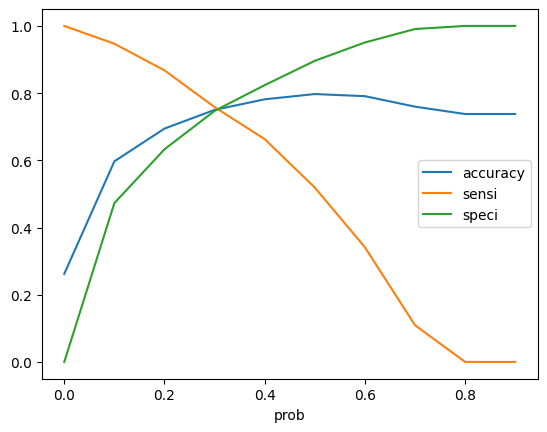

In [113]:
#lets plot accuracy sensitivity and specificity
cutoff_dr.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [115]:
##From above 0.3 is optimal cutoff propability

In [114]:
y_train_pred_final['final_prediction']=y_train_pred_final.churn_prob.map(lambda x:1 if x>0.3 else 0)
y_train_pred_final.head(10)

,churn,churn_prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
0,0,0.268225,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.242540,1,0,1,1,1,0,0,0,0,0,0,0,0
2,1,0.608366,2,1,1,1,1,1,1,1,1,0,0,0,1
3,0,0.475322,3,1,1,1,1,1,1,0,0,0,0,0,1
4,0,0.064500,4,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0.012347,5,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0.016193,6,0,1,0,0,0,0,0,0,0,0,0,0
7,1,0.617488,7,1,1,1,1,1,1,1,1,0,0,0,1
8,0,0.133519,8,0,1,1,0,0,0,0,0,0,0,0,0
9,0,0.063095,9,0,1,0,0,0,0,0,0,0,0,0,0
